## Analysis of the topics created by the Top2Vec model

- Primitives are loaded, as well as the topic weights
- They are merged into one df, and value 1 is added to all values (resulting in a range of 0-2)
- Topics are plotted over time

**Issues**

- Every topic shows the same fluctuation graph over time, which might suggest that there are too many topics, or that the sum of the topic weights should be divided by the number of documents

**Solutions**

- Hierarchically reduce the number of topics in top2vec, using `hierarchical_topic_reduction(num topics)` --> see part II in `top2vec_training.ipynb`.
- Normalize for the nr of documents per time entity, using `agg.('mean)`.

In [66]:
import ndjson
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


### Load primitives with corrected date and topic weights and merge both

In [46]:
# import primitives with corrected date and topic weights
with open('../../corpus/primitives_220331/events_repre_reduced.ndjson') as f:
    events = ndjson.load(f)

df_events = pd.DataFrame(events)
df_events.shape

(22721, 7)

In [49]:
# remove primitives that have no topic weights (shorter than 50 characters)

df_events.dropna(subset=['representation'], inplace=True)
df_events.shape

(19880, 7)

In [50]:
# transpose representations to 415 separate columns
representations = pd.DataFrame(df_events.representation.to_list(), index = df_events.index)

In [52]:
# add 1 to representation, to make all values positive

representations += 1
representations.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.045574,1.065554,1.042925,1.427912,1.043278,0.913891,1.108600,1.010454,1.171747,0.976329,...,1.066483,1.099415,1.145351,1.088113,1.096852,1.065975,1.264405,1.085996,1.015999,0.973189
1,0.937093,1.102978,1.057963,1.291033,0.990725,0.906070,1.085731,1.058166,1.201073,0.974777,...,1.071224,1.142968,1.279851,1.239297,1.259118,1.092115,1.265111,1.112580,1.136124,1.028215
2,0.964193,1.131296,1.130532,1.309217,0.977714,1.021414,1.192919,1.008254,1.205429,0.985177,...,1.111709,1.115378,1.258589,1.211264,1.098407,1.042337,1.252972,1.121597,1.147404,1.042110
3,1.052695,1.201881,1.052755,1.281837,1.045929,1.081266,1.097341,1.086104,1.279707,1.124421,...,1.321617,1.204463,1.321023,1.333703,1.176636,1.139524,1.374226,1.305459,1.236987,1.109461
5,0.996845,1.121589,1.065863,1.360595,1.046012,0.978017,1.119019,1.023248,1.188718,1.020967,...,1.211400,1.189012,1.198208,1.262564,1.184978,0.999856,1.304862,1.113701,1.212421,1.147694


In [55]:
# merge events and representations

total = pd.merge(left=df_events, right=representations, left_index=True, right_index=True).drop(columns='representation')

### Plot dominant topics over time

In [102]:
total['year'] = total['clean_date'].str[:4]
total['year'] = pd.to_numeric(total['year'])

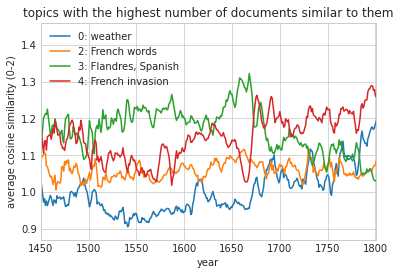

In [128]:
total.groupby('year')[0, 2, 3, 4].agg('mean').rolling(window=5).mean().plot()
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.75))
plt.title('topics with the highest number of documents similar to them')
plt.legend(['0: weather', '2: French words', '3: Flandres, Spanish', '4: French invasion'])
plt.ylabel('average cosine similarity (0-2)')
plt.xlabel('year')
plt.xlim([1450, 1800])
plt.show()

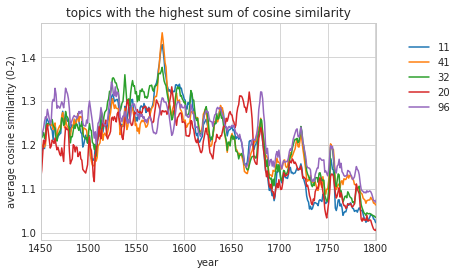

In [127]:
total.groupby('year')[11, 41, 32, 20, 96].agg('mean').rolling(window=5).mean().plot()
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.75))
plt.title('topics with the highest sum of cosine similarity')
plt.ylabel('average cosine similarity (0-2)')
plt.xlabel('year')
plt.xlim([1450, 1800])
plt.show()

### Observations

- 

(1450.0, 1800.0)

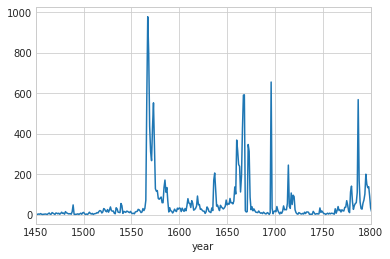

In [129]:
total.groupby('year')['year'].count().plot()
plt.xlim([1450, 1800])

In [57]:
total[range(0,99)].sum().sort_values(ascending=False)

11    24539.219106
41    24503.603199
32    24368.911694
20    24339.472756
96    24153.351078
          ...     
63    20529.889473
23    20016.096678
58    19967.053863
0     19697.312102
28    19520.042156
Length: 99, dtype: float64

### 